In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as st

In [3]:
google_public = pd.read_csv('google_public_reviews.csv')
google_public.drop('Unnamed: 0', axis=1, inplace=True)
google_public.head()
print(google_public.shape)

(5144, 42)


In [4]:
google = pd.read_csv('googlew.csv')
google.drop('Unnamed: 0', axis=1, inplace=True)
google.head()
print(google.shape)

(5133, 44)


In [5]:
google = pd.merge(google_public, google[['zipcode','share_tourists_zipcode']], left_on="zip_code", right_on='zipcode', how='left')

In [6]:
google.drop_duplicates(subset='result.place_id', inplace=True)

In [7]:
google.reset_index(drop=True, inplace=True)

In [8]:
google

,result.business_status,result.delivery,result.dine_in,result.name,result.place_id,result.rating,result.reservable,result.serves_beer,result.serves_breakfast,result.serves_brunch,...,total_population,restaurants_per_district_area,share_year_budget_rest_per_household,share_local_pop,share_of_surface_in_KM2,Restaurant Place ID,Sentiment Score,Sentiment,zipcode,share_tourists_zipcode
0,OPERATIONAL,True,1,restaurante la dehesa,ChIJe8y4CKAuQg0RC4YervOOVLg,4.0,True,1,1,1,...,195017,37.688442,17.863179,200.017436,0.026533,ChIJe8y4CKAuQg0RC4YervOOVLg,0.71114,Good,28050.0,8.058517
1,OPERATIONAL,True,1,casa corrochano,ChIJjWIe0PMrQg0RXJxYC8mlRcM,4.1,True,1,1,1,...,195017,37.688442,17.863179,200.017436,0.026533,ChIJjWIe0PMrQg0RXJxYC8mlRcM,0.40254,Good,28050.0,8.058517
2,OPERATIONAL,Unknown,1,la mano de pablo,ChIJmw6_CKAuQg0RY9Kcr3tR5OQ,4.4,True,1,0,1,...,195017,37.688442,17.863179,200.017436,0.026533,ChIJmw6_CKAuQg0RY9Kcr3tR5OQ,0.38708,Good,28050.0,8.058517
3,OPERATIONAL,False,1,el oso,ChIJsxAsqggsQg0Rz1mITdkhDaY,4.1,True,1,1,1,...,195017,37.688442,17.863179,200.017436,0.026533,ChIJsxAsqggsQg0Rz1mITdkhDaY,0.78602,Good,28050.0,8.058517
4,OPERATIONAL,Unknown,1,domino,ChIJjd0Nhu0rQg0R1Q0k5TsewKg,3.7,True,1,1,1,...,195017,37.688442,17.863179,200.017436,0.026533,ChIJjd0Nhu0rQg0R1Q0k5TsewKg,0.22376,Neutral,28050.0,8.058517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,OPERATIONAL,False,1,el rincon de paula ii,ChIJp_7UKJ0nQg0RnQKlxWxzKhM,4.3,True,1,1,1,...,153829,23.701138,15.207933,321.146138,0.042192,ChIJp_7UKJ0nQg0RnQKlxWxzKhM,0.40792,Good,28021.0,8.209144
5140,OPERATIONAL,False,1,casa domingo,ChIJHxgHwjEnQg0RpkM-ghqQ_Pk,4.4,True,1,1,1,...,153829,23.701138,15.207933,321.146138,0.042192,ChIJHxgHwjEnQg0RpkM-ghqQ_Pk,-0.04042,Neutral,28021.0,8.209144
5141,OPERATIONAL,False,1,bar la taskita,ChIJ8-lR1yQnQg0RwXHeD5PLr3I,3.0,Unknown,1,1,1,...,153829,23.701138,15.207933,321.146138,0.042192,ChIJ8-lR1yQnQg0RwXHeD5PLr3I,0.18060,Neutral,28021.0,8.209144
5142,OPERATIONAL,Unknown,1,restaurante lablanca,ChIJ1_rxn8cnQg0RkXO_edn5ygc,4.7,True,1,1,1,...,153829,23.701138,15.207933,321.146138,0.042192,ChIJ1_rxn8cnQg0RkXO_edn5ygc,0.55106,Good,28021.0,8.209144


In [9]:
google.drop(columns=['result.wheelchair_accessible_entrance','establishment',
       'point_of_interest', 'food', 'restaurant', 'bar', 'store',
       'meal_takeaway', 'cafe', 'meal_delivery', 'bakery', 'liquor_store',
       'night_club','zipcode','Restaurant Place ID'], axis=1, inplace=True)

In [10]:
google.columns

Index(['result.business_status', 'result.delivery', 'result.dine_in',
       'result.name', 'result.place_id', 'result.rating', 'result.reservable',
       'result.serves_beer', 'result.serves_breakfast', 'result.serves_brunch',
       'result.serves_dinner', 'result.serves_lunch',
       'result.serves_vegetarian_food', 'result.serves_wine', 'result.takeout',
       'result.user_ratings_total', 'result.website', 'zip_code',
       'price_level', 'success', 'distrito', 'total_population',
       'restaurants_per_district_area', 'share_year_budget_rest_per_household',
       'share_local_pop', 'share_of_surface_in_KM2', 'Sentiment Score',
       'Sentiment', 'share_tourists_zipcode'],
      dtype='object')

In [11]:
google['result.reservable'] = google['result.reservable'].map({'True': 1, 'Unknown': 0, 'False': 0})

In [12]:
boolean_cols = google.select_dtypes(include=['bool']).columns
google[boolean_cols] = google[boolean_cols].astype(int)

In [13]:
google['share_tourists_zipcode'] = google['share_tourists_zipcode'].fillna(google['share_tourists_zipcode'].mean())

In [14]:
google['result.business_status'] = google['result.business_status'].map({'OPERATIONAL': 1, 'CLOSED_TEMPORARILY': 0, 'CLOSED_PERMANENTLY': 0})

In [15]:
google.dtypes

result.business_status                    int64
result.delivery                          object
result.dine_in                            int64
result.name                              object
result.place_id                          object
result.rating                           float64
result.reservable                         int64
result.serves_beer                        int64
result.serves_breakfast                   int64
result.serves_brunch                      int64
result.serves_dinner                      int64
result.serves_lunch                       int64
result.serves_vegetarian_food             int64
result.serves_wine                        int64
result.takeout                            int64
result.user_ratings_total               float64
result.website                           object
zip_code                                  int64
price_level                             float64
success                                   int64
distrito                                

In [16]:
def t_test_features(s1, s2, features=['result.business_status','result.rating','result.user_ratings_total','price_level','result.reservable','success','result.serves_vegetarian_food',
                                      'result.takeout', 'share_year_budget_rest_per_household',
                                      'share_local_pop','Sentiment Score','restaurants_per_district_area',
                                      'result.serves_beer','result.serves_breakfast','result.serves_dinner', 'result.serves_lunch','result.serves_wine']):
    """Test means of a feature set of two samples
    
    Args:
        s1 (dataframe): sample 1
        s2 (dataframe): sample 2
        features (list): an array of features to test
    
    Returns:
        dict: a dictionary of t-test scores for each feature where the feature name is the key and the p-value is the value
    """
    results = {}

    # Your code here
    #dictionary comprehension to return first the feature and then the computed p-value for each feature
    results = {f:st.ttest_ind(s1[f],s2[f])[1] for f in features}
    return results

In [17]:
open_google = google[google['result.business_status']==1]
closed_google = google[google['result.business_status']==0]

In [18]:
closed_google['zip_code'].value_counts()

28038    13
28043    13
28010    12
28022    11
28017    10
28001    10
28030    10
28039     9
28042     9
28027     9
28006     9
28019     9
28037     9
28002     8
28004     8
28014     8
28053     8
28020     8
28045     7
28021     7
28032     6
28003     6
28025     6
28036     6
28033     6
28018     6
28009     5
28015     5
28046     5
28011     5
28029     5
28026     5
28007     4
28044     4
28012     4
28031     4
28008     3
28005     3
28050     3
28041     2
28013     2
28034     2
28054     2
28049     2
28016     2
28028     1
28024     1
Name: zip_code, dtype: int64

In [19]:
open_google.describe()

,result.business_status,result.dine_in,result.rating,result.reservable,result.serves_beer,result.serves_breakfast,result.serves_brunch,result.serves_dinner,result.serves_lunch,result.serves_vegetarian_food,...,zip_code,price_level,success,total_population,restaurants_per_district_area,share_year_budget_rest_per_household,share_local_pop,share_of_surface_in_KM2,Sentiment Score,share_tourists_zipcode
count,4852.0,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,...,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000
mean,1.0,0.989283,4.112758,0.667354,0.983512,0.856142,0.981863,0.992168,0.995672,0.068631,...,28025.579967,1.288541,0.557502,168732.515251,80.694720,21.162044,253.507779,0.042597,0.485759,46.713607
std,0.0,0.102978,0.503118,0.471210,0.127356,0.350982,0.133460,0.088159,0.065653,0.252853,...,14.630711,0.538756,0.496734,46717.029709,45.436231,9.427731,121.977841,0.102806,0.272817,69.858886
min,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,28001.000000,1.000000,0.000000,79328.000000,1.705882,10.819877,114.562049,0.006586,-0.891000,2.723654
25%,1.0,1.000000,3.900000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,28013.000000,1.000000,0.000000,139682.000000,46.091644,15.225889,174.587537,0.008042,0.318055,6.506507
50%,1.0,1.000000,4.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,28026.000000,1.000000,1.000000,153829.000000,93.636364,17.863179,234.365772,0.010680,0.520030,17.638120
75%,1.0,1.000000,4.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,28038.000000,2.000000,1.000000,213905.000000,124.354244,25.729709,268.656997,0.021696,0.693190,56.669573
max,1.0,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28054.000000,4.000000,1.000000,255514.000000,151.840491,57.576108,620.544503,0.586207,0.969400,585.585586


In [20]:
closed_google.describe()

,result.business_status,result.dine_in,result.rating,result.reservable,result.serves_beer,result.serves_breakfast,result.serves_brunch,result.serves_dinner,result.serves_lunch,result.serves_vegetarian_food,...,zip_code,price_level,success,total_population,restaurants_per_district_area,share_year_budget_rest_per_household,share_local_pop,share_of_surface_in_KM2,Sentiment Score,share_tourists_zipcode
count,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.0,0.989726,3.852055,0.178082,0.993151,0.986301,0.982877,0.996575,0.993151,0.099315,...,28024.739726,1.113014,0.0,171688.996575,85.172892,20.622468,251.343632,0.028277,0.373514,49.251304
std,0.0,0.101012,0.864395,0.383239,0.082618,0.116436,0.129954,0.058521,0.082618,0.299598,...,14.869677,0.394422,0.0,46391.144729,42.772409,8.425680,116.966954,0.071149,0.327669,71.271305
min,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,28001.000000,1.000000,0.0,79328.000000,1.705882,10.819877,114.562049,0.006586,-0.680800,2.723654
25%,0.0,1.000000,3.400000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,28011.750000,1.000000,0.0,139682.000000,46.091644,15.225889,154.179798,0.008042,0.113515,6.142506
50%,0.0,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,28024.500000,1.000000,0.0,157433.000000,109.124767,17.863179,234.365772,0.009164,0.419330,17.668531
75%,0.0,1.000000,4.400000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,28038.000000,1.000000,0.0,213905.000000,124.354244,25.729709,268.656997,0.021696,0.625055,64.302584
max,0.0,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28054.000000,3.000000,0.0,255514.000000,151.840491,57.576108,620.544503,0.586207,0.935120,295.941102


In [21]:
t_test_features(open_google, closed_google)

{'result.business_status': 0.0,
 'result.rating': 4.151711510382717e-16,
 'result.user_ratings_total': 3.058793211971956e-16,
 'price_level': 4.471311389707255e-08,
 'result.reservable': 6.236164112349293e-66,
 'success': 3.191761337286015e-79,
 'result.serves_vegetarian_food': 0.04650302754742726,
 'result.takeout': 0.10497592881123959,
 'share_year_budget_rest_per_household': 0.33947627387823964,
 'share_local_pop': 0.7679143451734648,
 'Sentiment Score': 1.7090669842770448e-11,
 'restaurants_per_district_area': 0.10086292967535825,
 'result.serves_beer': 0.20161039824347338,
 'result.serves_breakfast': 2.917707424367296e-10,
 'result.serves_dinner': 0.3992140594274357,
 'result.serves_lunch': 0.5306554452419381,
 'result.serves_wine': 0.02272607474709637}

In [22]:
successful = google[google['success']==1]
unsuccessful = google[google['success']==0]

In [23]:
successful.shape

(2705, 29)

In [24]:
unsuccessful.shape

(2439, 29)

In [25]:
successful['share_year_budget_rest_per_household'].mean()

21.23227380612415

In [26]:
unsuccessful['share_year_budget_rest_per_household'].mean()

21.019556420247582

In [27]:
#Might be a good way to encode district

In [28]:
pd.set_option('display.max_columns', 100)

In [29]:
unsuccessful[unsuccessful['result.user_ratings_total']>=2000]['result.rating'].mean()

4.268571428571429

# Hypothesis testing

In [32]:
level_one = google[google['price_level']==1.0]
level_two = google[google['price_level']==2.0]
level_three = google[google['price_level']==3.0]
level_four = google[google['price_level']==4.0]

In [33]:
t_test_features(level_one, level_two) #BINGO

{'result.business_status': 4.323054496764131e-11,
 'result.rating': 1.549491304813113e-09,
 'result.user_ratings_total': 9.451693916201463e-131,
 'price_level': 0.0,
 'result.reservable': 9.459233861137077e-107,
 'success': 1.1535612886213276e-05,
 'result.serves_vegetarian_food': 1.2854232665931394e-10,
 'result.takeout': 8.029299976972353e-06,
 'share_year_budget_rest_per_household': 1.988551569387054e-34,
 'share_local_pop': 0.3278565924113135,
 'Sentiment Score': 4.8522045979268184e-59,
 'restaurants_per_district_area': 2.1541782919116113e-15,
 'result.serves_beer': 0.31688653998255994,
 'result.serves_breakfast': 1.1242627080730792e-56,
 'result.serves_dinner': 0.03426561596382195,
 'result.serves_lunch': 0.36393638386992666,
 'result.serves_wine': 1.8331341986944796e-07}

In [34]:
#level_two restaurants are more successful
level_one['success'].mean()

0.5102511532547411

In [35]:
#level_one is around 15-30€ per capita and level two, from 30 to 50€
level_two['success'].mean()

0.5856610800744879

In [36]:
t_test_features(level_one, level_three)

{'result.business_status': 0.53358770286618,
 'result.rating': 2.0191147661706135e-07,
 'result.user_ratings_total': 2.2316519641044268e-32,
 'price_level': 0.0,
 'result.reservable': 9.013964485869064e-22,
 'success': 0.9982327071886553,
 'result.serves_vegetarian_food': 0.8651093351686142,
 'result.takeout': 5.3290963879510956e-39,
 'share_year_budget_rest_per_household': 4.189542989257374e-11,
 'share_local_pop': 0.14293748248546365,
 'Sentiment Score': 1.0588277909808213e-26,
 'restaurants_per_district_area': 8.510649573639852e-08,
 'result.serves_beer': 0.10895443661273925,
 'result.serves_breakfast': 9.573463330076338e-55,
 'result.serves_dinner': 0.24542263000327652,
 'result.serves_lunch': 0.7325645032964652,
 'result.serves_wine': 0.004402208749794459}

In [37]:
t_test_features(level_one, level_four)

{'result.business_status': 0.1938688832539718,
 'result.rating': 0.0035419723557749212,
 'result.user_ratings_total': 2.094594209838717e-05,
 'price_level': 0.0,
 'result.reservable': 9.85908759582519e-05,
 'success': 0.7596761980819993,
 'result.serves_vegetarian_food': 0.23130759461106726,
 'result.takeout': 4.551497692780364e-49,
 'share_year_budget_rest_per_household': 2.941106957451247e-06,
 'share_local_pop': 0.9055843174459138,
 'Sentiment Score': 9.584492603085008e-07,
 'restaurants_per_district_area': 0.043912502294798594,
 'result.serves_beer': 0.523165683156116,
 'result.serves_breakfast': 6.472700045444893e-16,
 'result.serves_dinner': 0.6436248855970053,
 'result.serves_lunch': 0.7373510354972218,
 'result.serves_wine': 0.25651546524138136}

In [38]:
t_test_features(level_two, level_three)#works too

{'result.business_status': 0.001685486524803076,
 'result.rating': 1.1433959022664414e-07,
 'result.user_ratings_total': 0.3151067202698778,
 'price_level': 0.0,
 'result.reservable': 0.08355219587926986,
 'success': 0.08502646395217689,
 'result.serves_vegetarian_food': 0.052994477666517444,
 'result.takeout': 6.308045652524485e-11,
 'share_year_budget_rest_per_household': 0.176619744470391,
 'share_local_pop': 0.2341230649769544,
 'Sentiment Score': 6.636981849169661e-07,
 'restaurants_per_district_area': 0.03381892146201099,
 'result.serves_beer': 0.16700021751580188,
 'result.serves_breakfast': 1.1986804055927408e-07,
 'result.serves_dinner': 0.524384171755613,
 'result.serves_lunch': 0.4178048572403207,
 'result.serves_wine': 0.12730480784730341}

In [39]:
t_test_features(level_four, level_three)

{'result.business_status': 0.25098229528217686,
 'result.rating': 0.042162254283881415,
 'result.user_ratings_total': 0.6644076404330903,
 'price_level': 0.0,
 'result.reservable': 0.920641089467033,
 'success': 0.7765497224160669,
 'result.serves_vegetarian_food': 0.22180298747138766,
 'result.takeout': 0.01657390812296461,
 'share_year_budget_rest_per_household': 0.02044100821548125,
 'share_local_pop': 0.2873756935636067,
 'Sentiment Score': 0.4711943320098311,
 'restaurants_per_district_area': 0.8556014158108466,
 'result.serves_beer': nan,
 'result.serves_breakfast': 0.42878825479730964,
 'result.serves_dinner': nan,
 'result.serves_lunch': 0.6916811893932346,
 'result.serves_wine': nan}

In [40]:
t_test_features(level_four, level_two)

{'result.business_status': 0.5435445786599904,
 'result.rating': 0.00017436530438920904,
 'result.user_ratings_total': 0.9486147452358595,
 'price_level': 0.0,
 'result.reservable': 0.42934093497058134,
 'success': 0.3016745692968902,
 'result.serves_vegetarian_food': 0.08371949250485176,
 'result.takeout': 1.1018523587649785e-16,
 'share_year_budget_rest_per_household': 0.014935401661644148,
 'share_local_pop': 0.9647069639787835,
 'Sentiment Score': 0.005471021728917267,
 'restaurants_per_district_area': 0.4656524319131572,
 'result.serves_beer': 0.5819832459346993,
 'result.serves_breakfast': 0.0012993470848069403,
 'result.serves_dinner': 0.7998592816941144,
 'result.serves_lunch': 0.7998592816941144,
 'result.serves_wine': 0.5435445786599906}

In [41]:
t_test_features(successful, unsuccessful)

{'result.business_status': 3.19176133728556e-79,
 'result.rating': 0.030333798963379805,
 'result.user_ratings_total': 2.3894033727591724e-12,
 'price_level': 0.0031028051639158676,
 'result.reservable': 2.943832518837075e-20,
 'success': 0.0,
 'result.serves_vegetarian_food': 1.9752329332853325e-08,
 'result.takeout': 0.30370533876199685,
 'share_year_budget_rest_per_household': 0.4164473790588402,
 'share_local_pop': 0.4367770687723215,
 'Sentiment Score': 0.6845766696163684,
 'restaurants_per_district_area': 0.9953759968154153,
 'result.serves_beer': 0.6752136305393581,
 'result.serves_breakfast': 0.009573746213444676,
 'result.serves_dinner': 0.006158100187627299,
 'result.serves_lunch': 0.002979507478189938,
 'result.serves_wine': 5.829085619457741e-12}

# Feat engineering

In [42]:
google.columns

Index(['result.business_status', 'result.delivery', 'result.dine_in',
       'result.name', 'result.place_id', 'result.rating', 'result.reservable',
       'result.serves_beer', 'result.serves_breakfast', 'result.serves_brunch',
       'result.serves_dinner', 'result.serves_lunch',
       'result.serves_vegetarian_food', 'result.serves_wine', 'result.takeout',
       'result.user_ratings_total', 'result.website', 'zip_code',
       'price_level', 'success', 'distrito', 'total_population',
       'restaurants_per_district_area', 'share_year_budget_rest_per_household',
       'share_local_pop', 'share_of_surface_in_KM2', 'Sentiment Score',
       'Sentiment', 'share_tourists_zipcode'],
      dtype='object')

In [43]:
google.drop(columns=['Sentiment','result.serves_brunch'], axis=1, inplace=True)

In [44]:
google['result.delivery'] = google['result.delivery'].map({'True': 1, 'Unknown': 0, 'False': 0})

In [45]:
google.head(1)

,result.business_status,result.delivery,result.dine_in,result.name,result.place_id,result.rating,result.reservable,result.serves_beer,result.serves_breakfast,result.serves_dinner,result.serves_lunch,result.serves_vegetarian_food,result.serves_wine,result.takeout,result.user_ratings_total,result.website,zip_code,price_level,success,distrito,total_population,restaurants_per_district_area,share_year_budget_rest_per_household,share_local_pop,share_of_surface_in_KM2,Sentiment Score,share_tourists_zipcode
0,1,1,1,restaurante la dehesa,ChIJe8y4CKAuQg0RC4YervOOVLg,4.0,1,1,1,1,1,0,1,1,1306.0,http://www.grupoladehesa.com/,28050,2.0,1,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.71114,8.058517


In [46]:
X = google.drop(columns=['result.name','result.website','distrito','result.place_id','success','result.business_status'])
y = google['result.business_status'] 

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [48]:
import xgboost as xgb

In [49]:
xgb_class = xgb.XGBClassifier()
xgb_class.fit(X_train, y_train)
xgb_class.score(X_test,y_test)

0.9455676516329704

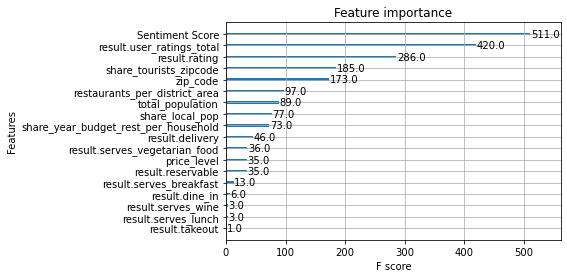

In [50]:
xgb.plot_importance(xgb_class)
plt.show()

In [51]:
#Encoding Website because I want to use it

In [52]:
google['result.website']

0            http://www.grupoladehesa.com/
1           https://www.casacorrochano.es/
2            http://www.lamanodepablo.com/
3         http://www.restauranteeloso.com/
4                                  Unknown
                       ...                
5139                               Unknown
5140                               Unknown
5141                               Unknown
5142                               Unknown
5143    https://tequenos-madrid.eatbu.com/
Name: result.website, Length: 5144, dtype: object

In [53]:
def website_to_num(row):
    website = row['result.website']
    if website == 'Unknown':
        return 0
    else:
        return 1

In [54]:
google['website'] = google.apply(website_to_num, axis=1)

In [55]:
google.drop('result.website', axis=1, inplace=True)

In [56]:
google

,result.business_status,result.delivery,result.dine_in,result.name,result.place_id,result.rating,result.reservable,result.serves_beer,result.serves_breakfast,result.serves_dinner,result.serves_lunch,result.serves_vegetarian_food,result.serves_wine,result.takeout,result.user_ratings_total,zip_code,price_level,success,distrito,total_population,restaurants_per_district_area,share_year_budget_rest_per_household,share_local_pop,share_of_surface_in_KM2,Sentiment Score,share_tourists_zipcode,website
0,1,1,1,restaurante la dehesa,ChIJe8y4CKAuQg0RC4YervOOVLg,4.0,1,1,1,1,1,0,1,1,1306.0,28050,2.0,1,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.71114,8.058517,1
1,1,1,1,casa corrochano,ChIJjWIe0PMrQg0RXJxYC8mlRcM,4.1,1,1,1,1,1,0,1,1,599.0,28050,1.0,1,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.40254,8.058517,1
2,1,0,1,la mano de pablo,ChIJmw6_CKAuQg0RY9Kcr3tR5OQ,4.4,1,1,0,1,1,0,1,1,3674.0,28050,2.0,1,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.38708,8.058517,1
3,1,0,1,el oso,ChIJsxAsqggsQg0Rz1mITdkhDaY,4.1,1,1,1,1,1,0,1,1,800.0,28050,3.0,0,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.78602,8.058517,1
4,1,0,1,domino,ChIJjd0Nhu0rQg0R1Q0k5TsewKg,3.7,1,1,1,1,1,0,1,1,651.0,28050,1.0,1,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.22376,8.058517,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,1,0,1,el rincon de paula ii,ChIJp_7UKJ0nQg0RnQKlxWxzKhM,4.3,1,1,1,1,1,0,1,1,415.0,28021,1.0,1,VILLAVERDE,153829,23.701138,15.207933,321.146138,0.042192,0.40792,8.209144,0
5140,1,0,1,casa domingo,ChIJHxgHwjEnQg0RpkM-ghqQ_Pk,4.4,1,1,1,1,1,0,1,1,196.0,28021,1.0,0,VILLAVERDE,153829,23.701138,15.207933,321.146138,0.042192,-0.04042,8.209144,0
5141,1,0,1,bar la taskita,ChIJ8-lR1yQnQg0RwXHeD5PLr3I,3.0,0,1,1,1,1,0,1,1,2.0,28021,1.0,1,VILLAVERDE,153829,23.701138,15.207933,321.146138,0.042192,0.18060,8.209144,0
5142,1,0,1,restaurante lablanca,ChIJ1_rxn8cnQg0RkXO_edn5ygc,4.7,1,1,1,1,1,0,1,1,7.0,28021,1.0,1,VILLAVERDE,153829,23.701138,15.207933,321.146138,0.042192,0.55106,8.209144,0


In [57]:
#counts = google.groupby('website')['result.business_status'].value_counts().unstack(fill_value=0)
#counts

In [58]:
#ratios_website = counts[1] / counts.sum(axis=1)

In [59]:
# map the ratios to the original DataFrame
#google['website'] = google['website'].map(ratios_website)

In [60]:
#google['website'].value_counts()

In [61]:
#X = google.drop(columns=['result.name','distrito','result.place_id','success','result.business_status'])
#y = google['result.business_status'] 

In [62]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [63]:
#xgb_class = xgb.XGBClassifier()
#xgb_class.fit(X_train, y_train)
#xgb_class.score(X_test,y_test)

In [64]:
#xgb.plot_importance(xgb_class)
#plt.show()

In [65]:
google.columns

Index(['result.business_status', 'result.delivery', 'result.dine_in',
       'result.name', 'result.place_id', 'result.rating', 'result.reservable',
       'result.serves_beer', 'result.serves_breakfast', 'result.serves_dinner',
       'result.serves_lunch', 'result.serves_vegetarian_food',
       'result.serves_wine', 'result.takeout', 'result.user_ratings_total',
       'zip_code', 'price_level', 'success', 'distrito', 'total_population',
       'restaurants_per_district_area', 'share_year_budget_rest_per_household',
       'share_local_pop', 'share_of_surface_in_KM2', 'Sentiment Score',
       'share_tourists_zipcode', 'website'],
      dtype='object')

In [66]:
#Creating concepts
#takeout, delivery, a la carte, has a bar, can be booked, has vegetarian options

In [67]:
#restaurant has a bar
google['serves_alcohol'] = (google['result.serves_beer'] == 1) & (google['result.serves_wine'] == 1)
google['serves_alcohol'] = google['serves_alcohol'].astype(int)

In [68]:
google['serves_alcohol'].value_counts()

1    4910
0     234
Name: serves_alcohol, dtype: int64

counts = google.groupby('serves_alcohol')['result.business_status'].value_counts().unstack(fill_value=0)
counts

ratios_bar = counts / counts.sum(axis=1)

ratios_bar[1]

google['serves_alcohol'] = google['serves_alcohol'].map(ratios_bar[1])

In [69]:
google.drop(columns=['result.serves_beer','result.serves_wine'], axis=1, inplace=True)

In [70]:
google.head(1)

,result.business_status,result.delivery,result.dine_in,result.name,result.place_id,result.rating,result.reservable,result.serves_breakfast,result.serves_dinner,result.serves_lunch,result.serves_vegetarian_food,result.takeout,result.user_ratings_total,zip_code,price_level,success,distrito,total_population,restaurants_per_district_area,share_year_budget_rest_per_household,share_local_pop,share_of_surface_in_KM2,Sentiment Score,share_tourists_zipcode,website,serves_alcohol
0,1,1,1,restaurante la dehesa,ChIJe8y4CKAuQg0RC4YervOOVLg,4.0,1,1,1,1,0,1,1306.0,28050,2.0,1,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.71114,8.058517,1,1


In [71]:
#encoding delivery, takeout and dine_in

count_one = google.groupby('result.delivery')['result.business_status'].value_counts().unstack(fill_value=0)
count_one

count_two = google.groupby('result.takeout')['result.business_status'].value_counts().unstack(fill_value=0)
count_two

count_three = google.groupby('result.dine_in')['result.business_status'].value_counts().unstack(fill_value=0)
count_three

ratios_delivery = count_one[1] / count_one.sum(axis=1)

ratios_delivery

ratios_takeout = count_two[1] / count_two.sum(axis=1)

ratios_takeout

ratios_dine_in = count_two[1] / count_two.sum(axis=1)

ratios_dine_in

google['result.delivery'] = google['result.delivery'].map(ratios_delivery)
google['result.takeout'] = google['result.takeout'].map(ratios_takeout)
google['result.dine_in'] = google['result.dine_in'].map(ratios_dine_in)

In [72]:
google.drop(columns=['result.serves_breakfast',
       'result.serves_dinner', 'result.serves_lunch'], axis=1, inplace=True)

In [73]:
google.head(1)

,result.business_status,result.delivery,result.dine_in,result.name,result.place_id,result.rating,result.reservable,result.serves_vegetarian_food,result.takeout,result.user_ratings_total,zip_code,price_level,success,distrito,total_population,restaurants_per_district_area,share_year_budget_rest_per_household,share_local_pop,share_of_surface_in_KM2,Sentiment Score,share_tourists_zipcode,website,serves_alcohol
0,1,1,1,restaurante la dehesa,ChIJe8y4CKAuQg0RC4YervOOVLg,4.0,1,0,1,1306.0,28050,2.0,1,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.71114,8.058517,1,1


In [74]:
#testing

In [75]:
X = google.drop(columns=['result.name','result.place_id','distrito','success','zip_code','result.business_status'])
y = google['result.business_status'] 

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [77]:
xgb_class = xgb.XGBClassifier()
xgb_class.fit(X_train, y_train)
xgb_class.score(X_test,y_test)

0.9455676516329704

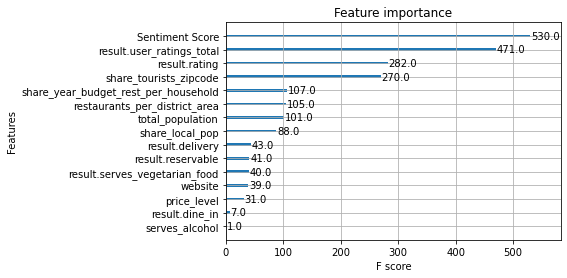

In [78]:
xgb.plot_importance(xgb_class)
plt.show()

In [79]:
count_zip = google.groupby('zip_code').agg({'result.user_ratings_total':'median'})
count_zip

,result.user_ratings_total
zip_code,
28001,858.0
28002,474.5
28003,653.0
28004,1220.5
28005,729.0
28006,731.0
28007,359.0
28008,500.0
28009,593.0


In [80]:
google['zip_code_encoded'] = google['zip_code'].map(count_zip['result.user_ratings_total'])

In [81]:
google.head(1)

,result.business_status,result.delivery,result.dine_in,result.name,result.place_id,result.rating,result.reservable,result.serves_vegetarian_food,result.takeout,result.user_ratings_total,zip_code,price_level,success,distrito,total_population,restaurants_per_district_area,share_year_budget_rest_per_household,share_local_pop,share_of_surface_in_KM2,Sentiment Score,share_tourists_zipcode,website,serves_alcohol,zip_code_encoded
0,1,1,1,restaurante la dehesa,ChIJe8y4CKAuQg0RC4YervOOVLg,4.0,1,0,1,1306.0,28050,2.0,1,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.71114,8.058517,1,1,531.0


In [82]:
X = google.drop(columns=['result.name','result.place_id','result.user_ratings_total','distrito','result.business_status'])
y = google['result.business_status'] 

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [84]:
xgb_class = xgb.XGBClassifier()
xgb_class.fit(X_train, y_train)
xgb_class.score(X_test,y_test)

0.937791601866252

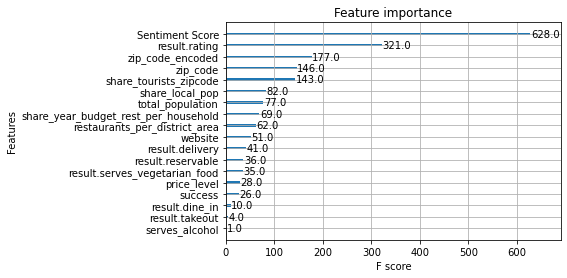

In [85]:
xgb.plot_importance(xgb_class)
plt.show()

In [86]:
#encode vegetarian food, reservable, price_level 

In [87]:
count_price = google.groupby('price_level').agg({'result.rating':'median'})
count_price

,result.rating
price_level,
1.0,4.1
2.0,4.2
3.0,4.3
4.0,4.5


In [88]:
google['price_level_encoded'] = google['price_level'].map(count_price['result.rating'])

In [89]:
count_distrito = google.groupby('distrito').agg({'Sentiment Score':'mean'})

In [90]:
count_distrito

,Sentiment Score
distrito,
ARGANZUELA,0.502548
CARABANCHEL,0.412690
CENTRO,0.648351
CHAMARTIN,0.551187
CHAMBERI,0.559003
CIUDAD LINEAL,0.459976
FUENCARRAL-EL PARDO,0.441247
HORTALEZA,0.417023
LATINA,0.418326


In [91]:
google['distrito_encoded'] = google['distrito'].map(count_distrito['Sentiment Score'])

In [92]:
google.head()

,result.business_status,result.delivery,result.dine_in,result.name,result.place_id,result.rating,result.reservable,result.serves_vegetarian_food,result.takeout,result.user_ratings_total,zip_code,price_level,success,distrito,total_population,restaurants_per_district_area,share_year_budget_rest_per_household,share_local_pop,share_of_surface_in_KM2,Sentiment Score,share_tourists_zipcode,website,serves_alcohol,zip_code_encoded,price_level_encoded,distrito_encoded
0,1,1,1,restaurante la dehesa,ChIJe8y4CKAuQg0RC4YervOOVLg,4.0,1,0,1,1306.0,28050,2.0,1,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.71114,8.058517,1,1,531.0,4.2,0.417023
1,1,1,1,casa corrochano,ChIJjWIe0PMrQg0RXJxYC8mlRcM,4.1,1,0,1,599.0,28050,1.0,1,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.40254,8.058517,1,1,531.0,4.1,0.417023
2,1,0,1,la mano de pablo,ChIJmw6_CKAuQg0RY9Kcr3tR5OQ,4.4,1,0,1,3674.0,28050,2.0,1,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.38708,8.058517,1,1,531.0,4.2,0.417023
3,1,0,1,el oso,ChIJsxAsqggsQg0Rz1mITdkhDaY,4.1,1,0,1,800.0,28050,3.0,0,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.78602,8.058517,1,1,531.0,4.3,0.417023
4,1,0,1,domino,ChIJjd0Nhu0rQg0R1Q0k5TsewKg,3.7,1,0,1,651.0,28050,1.0,1,HORTALEZA,195017,37.688442,17.863179,200.017436,0.026533,0.22376,8.058517,0,1,531.0,4.1,0.417023


In [93]:
X = google.drop(columns=['result.name','result.place_id','result.user_ratings_total','success','result.business_status','result.rating','Sentiment Score','distrito','zip_code'])
y = google['result.business_status'] 

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [95]:
xgb_class = xgb.XGBClassifier()
xgb_class.fit(X_train, y_train)
xgb_class.score(X_test,y_test)

0.9346811819595645

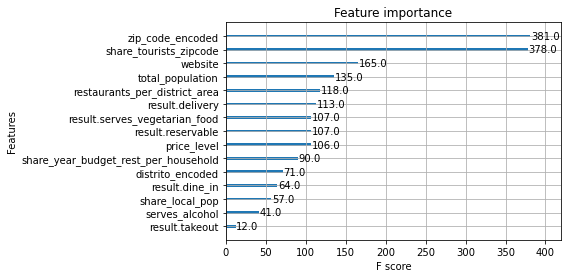

In [96]:
xgb.plot_importance(xgb_class)
plt.show()

In [97]:
google.drop('total_population', axis=1, inplace=True)

In [98]:
google.head()

,result.business_status,result.delivery,result.dine_in,result.name,result.place_id,result.rating,result.reservable,result.serves_vegetarian_food,result.takeout,result.user_ratings_total,zip_code,price_level,success,distrito,restaurants_per_district_area,share_year_budget_rest_per_household,share_local_pop,share_of_surface_in_KM2,Sentiment Score,share_tourists_zipcode,website,serves_alcohol,zip_code_encoded,price_level_encoded,distrito_encoded
0,1,1,1,restaurante la dehesa,ChIJe8y4CKAuQg0RC4YervOOVLg,4.0,1,0,1,1306.0,28050,2.0,1,HORTALEZA,37.688442,17.863179,200.017436,0.026533,0.71114,8.058517,1,1,531.0,4.2,0.417023
1,1,1,1,casa corrochano,ChIJjWIe0PMrQg0RXJxYC8mlRcM,4.1,1,0,1,599.0,28050,1.0,1,HORTALEZA,37.688442,17.863179,200.017436,0.026533,0.40254,8.058517,1,1,531.0,4.1,0.417023
2,1,0,1,la mano de pablo,ChIJmw6_CKAuQg0RY9Kcr3tR5OQ,4.4,1,0,1,3674.0,28050,2.0,1,HORTALEZA,37.688442,17.863179,200.017436,0.026533,0.38708,8.058517,1,1,531.0,4.2,0.417023
3,1,0,1,el oso,ChIJsxAsqggsQg0Rz1mITdkhDaY,4.1,1,0,1,800.0,28050,3.0,0,HORTALEZA,37.688442,17.863179,200.017436,0.026533,0.78602,8.058517,1,1,531.0,4.3,0.417023
4,1,0,1,domino,ChIJjd0Nhu0rQg0R1Q0k5TsewKg,3.7,1,0,1,651.0,28050,1.0,1,HORTALEZA,37.688442,17.863179,200.017436,0.026533,0.22376,8.058517,0,1,531.0,4.1,0.417023


In [99]:
#Encoding reservable, veggie food

count_booked = google.groupby('result.reservable')['result.business_status'].value_counts().unstack(fill_value=0)
print(count_booked)
booking = count_booked[1] / count_booked.sum(axis=1)
print(booking)

google['result.reservable'] = google['result.reservable'].map(booking)

count_veggie = google.groupby('result.serves_vegetarian_food')['result.business_status'].value_counts().unstack(fill_value=0)

veggie = count_veggie[1] / count_veggie.sum(axis=1)
veggie

google['result.serves_vegetarian_food'] = google['result.serves_vegetarian_food'].map(veggie)

# Scaling

In [100]:
google.isna().sum()

result.business_status                  0
result.delivery                         0
result.dine_in                          0
result.name                             0
result.place_id                         0
result.rating                           0
result.reservable                       0
result.serves_vegetarian_food           0
result.takeout                          0
result.user_ratings_total               0
zip_code                                0
price_level                             0
success                                 0
distrito                                0
restaurants_per_district_area           0
share_year_budget_rest_per_household    0
share_local_pop                         0
share_of_surface_in_KM2                 0
Sentiment Score                         0
share_tourists_zipcode                  0
website                                 0
serves_alcohol                          0
zip_code_encoded                        0
price_level_encoded               

In [101]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normalizer = normalizer.fit(X_train)
X_train_normalized = normalizer.transform(X_train)
X_test_normalized = normalizer.transform(X_test)

In [102]:
print(np.isnan(X_train_normalized).any())
print(np.isinf(X_train_normalized).any())
print(np.isnan(y_train).any())
print(np.isinf(y_train).any())

False
False
False
False


In [103]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_normalized)
X_test_imputed = imputer.fit_transform(X_test_normalized)

In [104]:
len(X_train_imputed)

3858

In [105]:
print(np.max(X_train_imputed))
print(np.min(X_train_imputed))
print(np.max(y_train))
print(np.min(y_train))

1.0000000000000002
0.0
1
0


In [106]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_imputed)
X_test_normalized = scaler.transform(X_test_imputed)

In [107]:
print(np.max(X_train_normalized))
print(np.min(X_train_normalized))
print(np.max(y_train))
print(np.min(y_train))

1.0
0.0
1
0


In [108]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(max_depth=11, n_estimators=100, random_state=0)
clf.fit(X_train_imputed, y_train)
clf.score(X_test_normalized, y_test)

0.942457231726283

# Optimizing parameters for Random Forest

<AxesSubplot:>

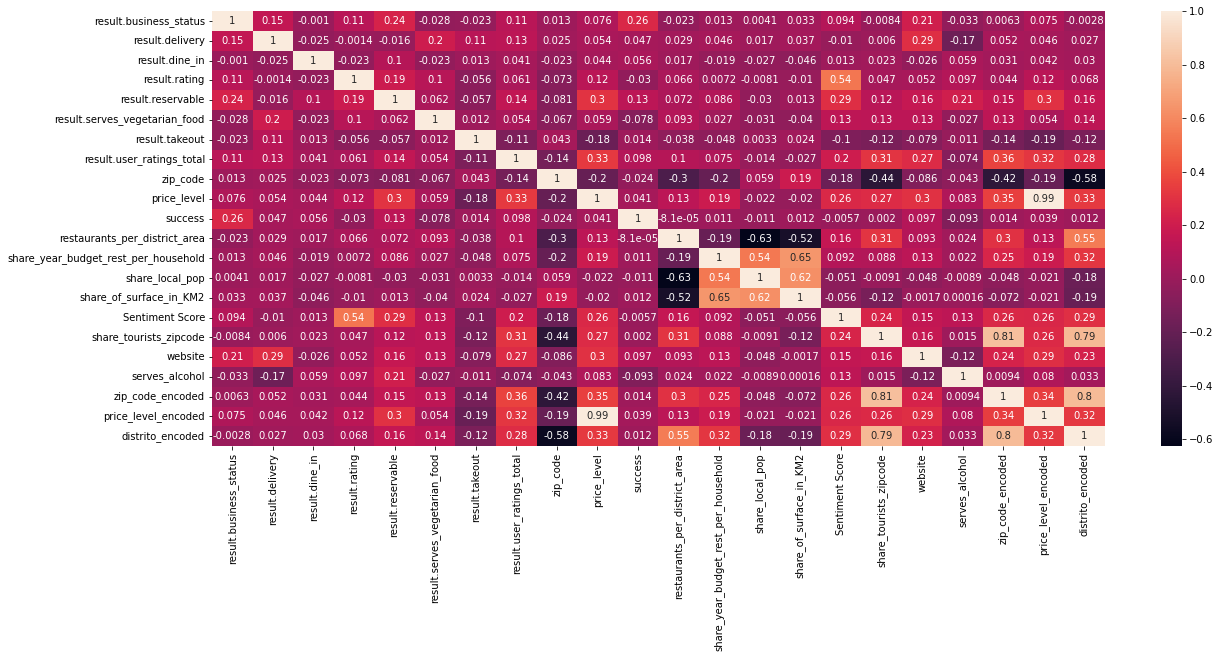

In [109]:
plt.figure(figsize=(20,8))
sns.heatmap(google.corr(), annot=True)

### Cross validation

In [110]:
from sklearn.model_selection import cross_validate

model = RandomForestClassifier()
results = cross_validate(model, google.drop(columns=['result.name','result.place_id','result.user_ratings_total','success','result.business_status','distrito','zip_code']), 
                         google['result.business_status'], cv = 10)

In [111]:
print(results['test_score'].mean())

0.9200883986249103


In [112]:
results['test_score']

array([0.94757282, 0.92427184, 0.94368932, 0.93009709, 0.88132296,
       0.93579767, 0.91828794, 0.84435798, 0.93579767, 0.93968872])

# Creating dictionaries

In [113]:
google.sample(5)

,result.business_status,result.delivery,result.dine_in,result.name,result.place_id,result.rating,result.reservable,result.serves_vegetarian_food,result.takeout,result.user_ratings_total,zip_code,price_level,success,distrito,restaurants_per_district_area,share_year_budget_rest_per_household,share_local_pop,share_of_surface_in_KM2,Sentiment Score,share_tourists_zipcode,website,serves_alcohol,zip_code_encoded,price_level_encoded,distrito_encoded
4210,0,0,1,alimatacion jpulido,ChIJfblDSU0mQg0Rds6tuUbPdA4,4.0,0,0,1,3.0,28026,1.0,0,USERA,93.636364,13.861026,195.295423,0.010680,-0.401900,9.679101,0,1,174.0,4.1,0.389170
4819,1,1,1,la fabula,ChIJISzwPs-JQQ0RFwFyH19j8dg,3.6,1,0,1,444.0,28054,2.0,0,LATINA,14.998037,30.924738,620.544503,0.066675,0.290380,64.048423,1,1,563.5,4.2,0.418326
1524,1,1,1,casa carmen,ChIJU1L_3iUvQg0Rbt25o-lBhvE,3.7,1,0,1,1977.0,28043,2.0,1,CIUDAD LINEAL,126.909722,15.225889,146.309850,0.007880,0.382680,2.723654,1,1,264.5,4.2,0.459976
4544,1,0,1,el cuadro,ChIJaeuXFJYnQg0RCiKW7lQ5nXM,4.3,1,0,1,438.0,28019,1.0,0,CARABANCHEL,47.021277,16.223379,385.390649,0.021267,0.663540,33.599173,1,1,109.5,4.1,0.412690
1762,1,0,0,polleria hueveria cristobal,ChIJD6fHB0UvQg0RK5gw-fVYcEU,3.6,0,0,1,5.0,28033,1.0,0,CIUDAD LINEAL,126.909722,15.225889,146.309850,0.007880,0.106067,7.773260,0,1,273.0,4.1,0.459976


In [114]:
google.columns

Index(['result.business_status', 'result.delivery', 'result.dine_in',
       'result.name', 'result.place_id', 'result.rating', 'result.reservable',
       'result.serves_vegetarian_food', 'result.takeout',
       'result.user_ratings_total', 'zip_code', 'price_level', 'success',
       'distrito', 'restaurants_per_district_area',
       'share_year_budget_rest_per_household', 'share_local_pop',
       'share_of_surface_in_KM2', 'Sentiment Score', 'share_tourists_zipcode',
       'website', 'serves_alcohol', 'zip_code_encoded', 'price_level_encoded',
       'distrito_encoded'],
      dtype='object')

In [115]:
districts = google[['distrito', 'restaurants_per_district_area',
       'share_year_budget_rest_per_household', 'share_local_pop',
       'share_of_surface_in_KM2', 'distrito_encoded']]

In [116]:
zip_codes = google[['zip_code','share_tourists_zipcode','zip_code_encoded']]

In [117]:
price_levels = google[['price_level', 'price_level_encoded']]

In [118]:
districts

,distrito,restaurants_per_district_area,share_year_budget_rest_per_household,share_local_pop,share_of_surface_in_KM2,distrito_encoded
0,HORTALEZA,37.688442,17.863179,200.017436,0.026533,0.417023
1,HORTALEZA,37.688442,17.863179,200.017436,0.026533,0.417023
2,HORTALEZA,37.688442,17.863179,200.017436,0.026533,0.417023
3,HORTALEZA,37.688442,17.863179,200.017436,0.026533,0.417023
4,HORTALEZA,37.688442,17.863179,200.017436,0.026533,0.417023
...,...,...,...,...,...,...
5139,VILLAVERDE,23.701138,15.207933,321.146138,0.042192,0.336423
5140,VILLAVERDE,23.701138,15.207933,321.146138,0.042192,0.336423
5141,VILLAVERDE,23.701138,15.207933,321.146138,0.042192,0.336423
5142,VILLAVERDE,23.701138,15.207933,321.146138,0.042192,0.336423


In [119]:
data_dict_list = districts.to_dict(orient='records')

# create dictionary with district name as key and list of values as value
district_dict = {}
for data_dict in data_dict_list:
    district = data_dict['distrito']
    values = list(data_dict.values())[1:]
    district_dict[district] = values

In [120]:
district_dict

{'HORTALEZA': [37.68844221105528,
  17.86317948717949,
  200.0174358974359,
  0.0265333333333333,
  0.4170234232804233],
 'SAN BLAS-CANILLEJAS': [62.264150943396224,
  10.819877344877344,
  114.56204906204906,
  0.016060606060606,
  0.429501996124031],
 'RETIRO': [124.35424354243544,
  26.43293768545994,
  174.58753709198814,
  0.0080415430267062,
  0.5387095089285714],
 'SALAMANCA': [110.26119402985074,
  31.00871404399324,
  246.12013536379013,
  0.0090693739424703,
  0.5533441939393939],
 'CIUDAD LINEAL': [126.90972222222224,
  15.225889192886456,
  146.30984952120383,
  0.0078796169630642,
  0.45997566877303847],
 'MORATALAZ': [115.46052631578948,
  16.511823361823364,
  131.6096866096866,
  0.0086609686609686,
  0.3986984492753623],
 'VICALVARO': [12.55656108597285,
  17.23536036036036,
  178.66666666666666,
  0.0796396396396396,
  0.3828384523809524],
 'FUENCARRAL-EL PARDO': [1.7058823529411764,
  57.57610837438424,
  606.6034482758621,
  0.5862068965517241,
  0.4412468543046358]

In [121]:
zip_codes

,zip_code,share_tourists_zipcode,zip_code_encoded
0,28050,8.058517,531.0
1,28050,8.058517,531.0
2,28050,8.058517,531.0
3,28050,8.058517,531.0
4,28050,8.058517,531.0
...,...,...,...
5139,28021,8.209144,116.0
5140,28021,8.209144,116.0
5141,28021,8.209144,116.0
5142,28021,8.209144,116.0


In [122]:
data_dict_list = zip_codes.to_dict(orient='records')

# create dictionary with district name as key and list of values as value
zipcode_dict = {}
for data_dict in data_dict_list:
    zip_code = data_dict['zip_code']
    values = list(data_dict.values())[1:]
    zipcode_dict[zip_code] = values

In [123]:
zipcode_dict

{28050: [8.05851723282916, 531.0],
 28042: [18.125268125268125, 211.0],
 28022: [3.903903903903904, 278.5],
 28037: [4.436254436254436, 184.0],
 28009: [37.954621287954616, 593.0],
 28007: [22.33165368758589, 359.0],
 28001: [127.62762762762762, 858.0],
 28028: [20.7025207025207, 273.5],
 28006: [45.48237557946296, 731.0],
 28027: [13.61826943222292, 235.5],
 28017: [4.03852127990059, 134.5],
 28043: [2.723653886444584, 264.5],
 28033: [7.773259985649367, 273.0],
 28030: [5.005005005005005, 232.0],
 28032: [6.142506142506143, 237.0],
 28052: [46.85766005248785, 355.0],
 28034: [9.00900900900901, 283.0],
 28049: [18.29954954954955, 546.0],
 28048: [585.5855855855856, 769.0],
 28035: [5.323505323505324, 327.5],
 28016: [10.71193144363876, 514.0],
 28036: [33.78378378378379, 775.0],
 28046: [80.90327169274538, 538.0],
 28002: [21.5994683207798, 474.5],
 28020: [16.52862539959314, 688.5],
 28029: [17.6381200477586, 267.5],
 28039: [46.85766005248785, 142.0],
 28031: [17.66853059956508, 215

In [124]:
price_levels

,price_level,price_level_encoded
0,2.0,4.2
1,1.0,4.1
2,2.0,4.2
3,3.0,4.3
4,1.0,4.1
...,...,...
5139,1.0,4.1
5140,1.0,4.1
5141,1.0,4.1
5142,1.0,4.1


In [125]:
data_dict_list = price_levels.to_dict(orient='records')

# create dictionary with district name as key and list of values as value
prices_dict = {}
for data_dict in data_dict_list:
    prices = data_dict['price_level']
    values = list(data_dict.values())[1:]
    prices_dict[prices] = values

In [126]:
prices_dict

{2.0: [4.2], 1.0: [4.1], 3.0: [4.3], 4.0: [4.5]}

# Random Search - Hyperparameter tuning

In [127]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] #10
# Number of features to consider at every split <- a non-numeric parameter, no problem. Could also have been used in gridsearch
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] #11
max_depth.append(None) #<- plus no cap
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [128]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['sqrt', 'log2'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [129]:
# random search to the rescue
from sklearn.model_selection import RandomizedSearchCV

# in random search you have to say how many iterations you want to get:
# n_ iter -> how many random combinations he will try
# n_jobs -> if you want sklearn to parallelize the process. Can also be used in grid search

random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 15, cv = 3, n_jobs = 15)

In [ ]:
random_search.fit(X_train_imputed, y_train)

In [ ]:
random_search.best_params_

In [ ]:
random_search.best_score_

# Fixing imbalance

In [ ]:
#Remember that 1 is operational and 0 is closed
count_classes = pd.value_counts(google['result.business_status'])
count_classes.plot(kind = 'bar')

In [ ]:
display(open_google.shape)
display(closed_google.shape)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 123, sampling_strategy=1.0)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_imputed, y_train)

In [ ]:
model = RandomForestClassifier(max_depth=110, n_estimators=2000, bootstrap=True, min_samples_split=10, min_samples_leaf=4, random_state=0)
model.fit(X_train_SMOTE, y_train_SMOTE)
model.score(X_test_normalized, y_test)

# Clean model for pickling

In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
#Creating dictionaries for converting user inputs into assigned values:
#the model will have concept options: delivery, dine_in, reservable, takeout, veggie_food, serves alcohol, website, zip_code (2),
#price_level(1) and district(5) (10 questions)
# 15 total

In [ ]:
google_model = google.drop(columns=['result.name','result.place_id','result.rating','result.user_ratings_total',
                                   'zip_code','price_level', 'success', 'distrito','Sentiment Score'], axis=1)

In [ ]:
google_model

In [ ]:
new_order = ['result.business_status','restaurants_per_district_area', 'share_year_budget_rest_per_household',
       'share_local_pop', 'share_of_surface_in_KM2','distrito_encoded', 'share_tourists_zipcode', 'zip_code_encoded',
             'price_level_encoded','result.delivery', 'result.dine_in','result.reservable', 'result.serves_vegetarian_food', 'result.takeout',
              'website', 'serves_alcohol']

In [ ]:
google_model = google_model.reindex(columns=new_order)

In [ ]:
google_model

In [ ]:
X = google_model.drop(columns=['result.business_status'])
y = google_model['result.business_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [ ]:
sm = SMOTE(random_state = 123, sampling_strategy=1.0)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
xgb_class = xgb.XGBClassifier()
xgb_class.fit(X_train_SMOTE, y_train_SMOTE)
xgb_class.score(X_test,y_test)

In [ ]:
xgb.plot_importance(xgb_class)
plt.show()

In [ ]:
model = RandomForestClassifier(max_depth=110, n_estimators=2000, bootstrap=True, min_samples_split=10, min_samples_leaf=4, random_state=0)
model.fit(X_train_SMOTE, y_train_SMOTE)
model.score(X_test_normalized, y_test)

In [ ]:
#Going with the GBC

# Pickling GBC

In [ ]:
import pickle

pickle.dump(xgb_class, open('model.p', 'wb'))

# Pickling dictionaries

In [ ]:
prices_dict

In [ ]:
with open('prices_dict.p', 'wb') as f:
    pickle.dump(prices_dict, f)

In [ ]:
district_dict

In [ ]:
with open('district_dict.p', 'wb') as f:
    pickle.dump(district_dict, f)

In [ ]:
zipcode_dict

In [ ]:
with open('zipcode_dict.p', 'wb') as f:
    pickle.dump(zipcode_dict, f)

In [ ]:
model.predict([[114.3953934740883,
  19.33414429530201,
  234.3657718120805,
  0.008741610738255,
  0.6483508805668016, 
    259.4366518417152, 1843.0, 4.2, 0, 1, 0, 0, 0, 0, 1]])